### Nathan Reed
### Week 12
### Prof. Jim
### 06/03/2023

In [146]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
        
import numpy as np
import pandas as pd
import thinkplot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as ss
import thinkstats2
import statsmodels.formula.api as smf
warnings.simplefilter(action='ignore', category=FutureWarning)
video_game_df = pd.read_csv('Video_Games_Sales.csv')

With my data I hope to see if critic and user score significantly effect sales globaly.

I am first going to clean the data of any 'NaN' data values, and then resetting the observation numbers.

In [107]:
video_game_df = video_game_df.dropna()
video_game_df = video_game_df.reset_index(drop=True)
video_game_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


I chose the variables Critic_Score meaning the average score the critic gave the game out of 100, User_Score meaning the average score the User gave the video game out of 10, Global_Sales meaning the total global copies sold in millions, JP_Sales meaning the total Japan copies sold in millions, and NA_Sales meaning the total North American copies sold in millions. 

I then made histograms of the 5 most important variables in my dataset.

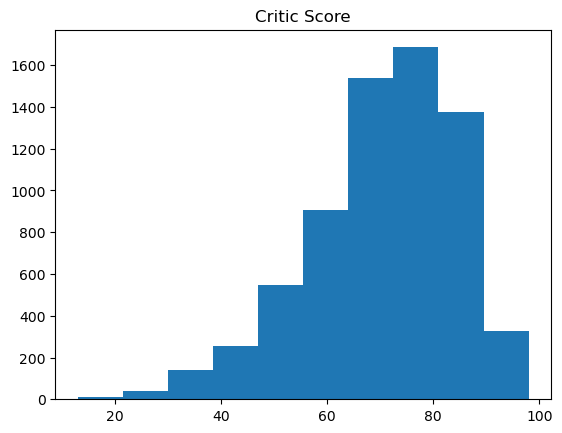

In [96]:
plt.hist(video_game_df['Critic_Score'])
plt.title("Critic Score")
plt.show()

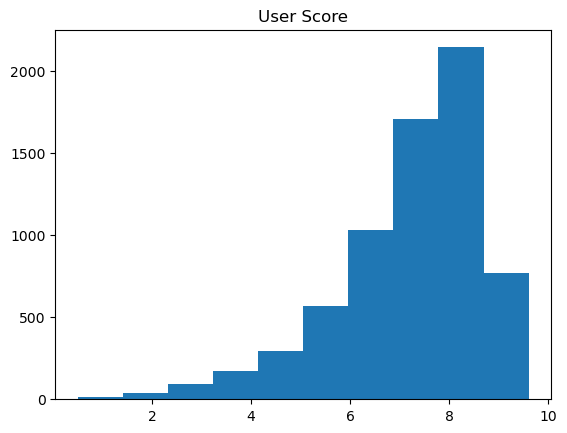

In [97]:
plt.hist(video_game_df['User_Score'])
plt.title("User Score")
plt.show()

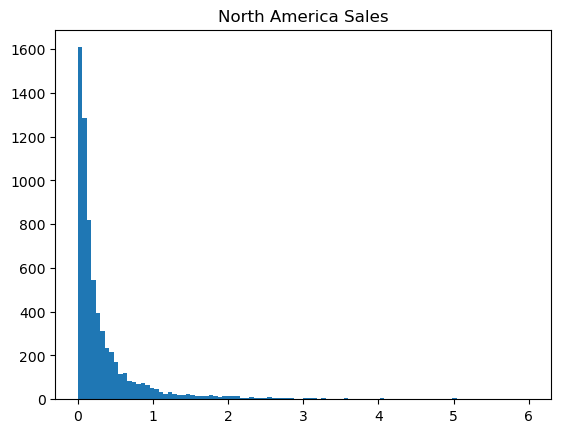

In [108]:
plt.hist(video_game_df['NA_Sales'], bins=100, range=[0,6])
plt.title("North America Sales")
plt.show()

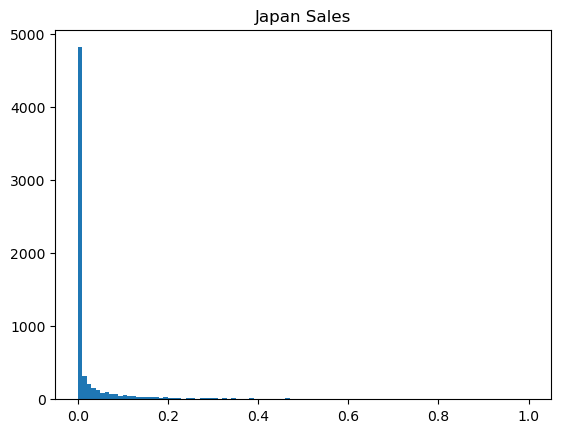

In [7]:
plt.hist(video_game_df['JP_Sales'], bins=100, range=[0,1])
plt.title("Japan Sales")
plt.show()

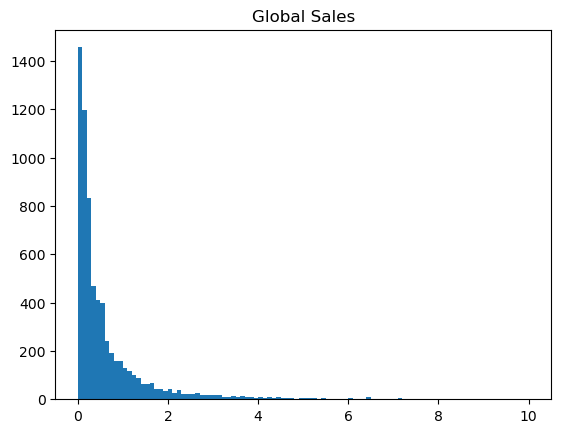

In [8]:
plt.hist(video_game_df['Global_Sales'], bins=100, range=[0,10])
plt.title("Global Sales")
plt.show()

I will now calculate the mean, mode, spread, and tails of each variable.

In [37]:
critic_score_mean = round(video_game_df['Critic_Score'].mean(), 1)
critic_score_mode = video_game_df['Critic_Score'].mode()[0]
critic_score_min = video_game_df['Critic_Score'].describe()[3]
critic_score_25 = video_game_df['Critic_Score'].describe()[4]
critic_score_50 = video_game_df['Critic_Score'].describe()[5]
critic_score_75 = video_game_df['Critic_Score'].describe()[6]
critic_score_max = video_game_df['Critic_Score'].describe()[7]
print('The mean of Critic Score is ' + str(critic_score_mean) + '. The mode is ' + str(critic_score_mode) + 
      '. Spread is min: ' + str(critic_score_min) + ', 25%: ' + str(critic_score_25) + ', 50%: ' + str(critic_score_50) +
      ', 75%: ' + str(critic_score_75) + ', and max: ' + str(critic_score_max) + '. The tail is to the left or left skewed.')

The mean of Critic Score is 70.3. The mode is 80.0. Spread is min: 13.0, 25%: 62.0, 50%: 72.0, 75%: 80.0, and max: 98.0. The tail is to the left or left skewed.


In [38]:
user_score_mean = round(video_game_df['User_Score'].mean(), 1)
user_score_mode = video_game_df['User_Score'].mode()[0]
user_score_min = video_game_df['User_Score'].describe()[3]
user_score_25 = video_game_df['User_Score'].describe()[4]
user_score_50 = video_game_df['User_Score'].describe()[5]
user_score_75 = video_game_df['User_Score'].describe()[6]
user_score_max = video_game_df['User_Score'].describe()[7]
print('The mean of User Score is ' + str(user_score_mean) + '. The mode is ' + str(user_score_mode) + 
      '. Spread is min: ' + str(user_score_min) + ', 25%: ' + str(user_score_25) + ', 50%: ' + str(user_score_50) +
      ', 75%: ' + str(user_score_75) + ', and max: ' + str(user_score_max) + '. The tail is to the left or left skewed.')

The mean of User Score is 7.2. The mode is 7.8. Spread is min: 0.5, 25%: 6.5, 50%: 7.5, 75%: 8.2, and max: 9.6. The tail is to the left or left skewed.


In [45]:
global_sales_mean = round(video_game_df['Global_Sales'].mean(), 1)
global_sales_mode = video_game_df['Global_Sales'].mode()[0]
global_sales_min = video_game_df['Global_Sales'].describe()[3]
global_sales_25 = video_game_df['Global_Sales'].describe()[4]
global_sales_50 = video_game_df['Global_Sales'].describe()[5]
global_sales_75 = video_game_df['Global_Sales'].describe()[6]
global_sales_max = video_game_df['Global_Sales'].describe()[7]
print('The mean of Global Sales is ' + str(global_sales_mean) + '. The mode is ' + str(global_sales_mode) + 
      '. Spread is min: ' + str(global_sales_min) + ', 25%: ' + str(global_sales_25) + ', 50%: ' + str(global_sales_50) +
      ', 75%: ' + str(global_sales_75) + ', and max: ' + str(global_sales_max) + '. The tail is to the right or right ' 
      'skewed.')

The mean of Global Sales is 0.8. The mode is 0.02. Spread is min: 0.01, 25%: 0.11, 50%: 0.29, 75%: 0.75, and max: 82.53. The tail is to the right or right skewed.


In [46]:
jp_sales_mean = round(video_game_df['JP_Sales'].mean(), 1)
jp_sales_mode = video_game_df['JP_Sales'].mode()[0]
jp_sales_min = video_game_df['JP_Sales'].describe()[3]
jp_sales_25 = video_game_df['JP_Sales'].describe()[4]
jp_sales_50 = video_game_df['JP_Sales'].describe()[5]
jp_sales_75 = video_game_df['JP_Sales'].describe()[6]
jp_sales_max = video_game_df['JP_Sales'].describe()[7]
print('The mean of Japan Sales is ' + str(jp_sales_mean) + '. The mode is ' + str(jp_sales_mode) + 
      '. Spread is min: ' + str(jp_sales_min) + ', 25%: ' + str(jp_sales_25) + ', 50%: ' + str(jp_sales_50) +
      ', 75%: ' + str(jp_sales_75) + ', and max: ' + str(jp_sales_max) + '. The tail  is to the right or right skewed.')

The mean of Japan Sales is 0.1. The mode is 0.0. Spread is min: 0.0, 25%: 0.0, 50%: 0.0, 75%: 0.01, and max: 6.5. The tail  is to the right or right skewed.


In [47]:
na_sales_mean = round(video_game_df['NA_Sales'].mean(), 1)
na_sales_mode = video_game_df['NA_Sales'].mode()[0]
na_sales_min = video_game_df['NA_Sales'].describe()[3]
na_sales_25 = video_game_df['NA_Sales'].describe()[4]
na_sales_50 = video_game_df['NA_Sales'].describe()[5]
na_sales_75 = video_game_df['NA_Sales'].describe()[6]
na_sales_max = video_game_df['NA_Sales'].describe()[7]
print('The mean of North American Sales is ' + str(na_sales_mean) + '. The mode is ' + str(na_sales_mode) + 
      '. Spread is min: ' + str(na_sales_min) + ', 25%: ' + str(na_sales_25) + ', 50%: ' + str(na_sales_50) +
      ', 75%: ' + str(na_sales_75) + ', and max:     ' + str(na_sales_max) + '. The tail is to the right or right skewed.')

The mean of North American Sales is 0.4. The mode is 0.0. Spread is min: 0.0, 25%: 0.06, 50%: 0.15, 75%: 0.39, and max:     41.36. The tail is to the right or right skewed.


I will now run a PMF comparing the global_Sales portion from Japan and the Global Sales portion from North America.

(0.0, 25.0)

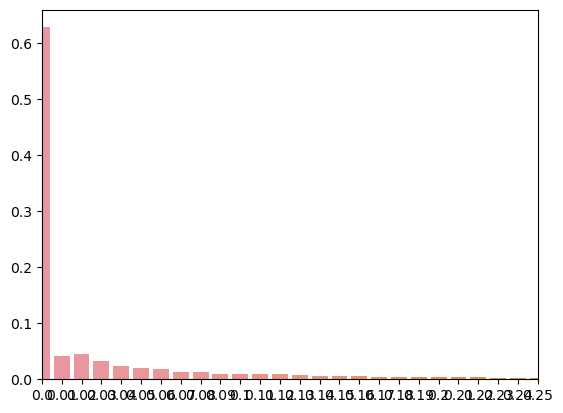

In [71]:
jp_pmf = video_game_df['JP_Sales'].value_counts(normalize=True)    
jp_pmf_graph = sns.barplot(jp_pmf.index, jp_pmf.values)
jp_pmf_graph.set_xlim(0, 25)

(0.0, 25.0)

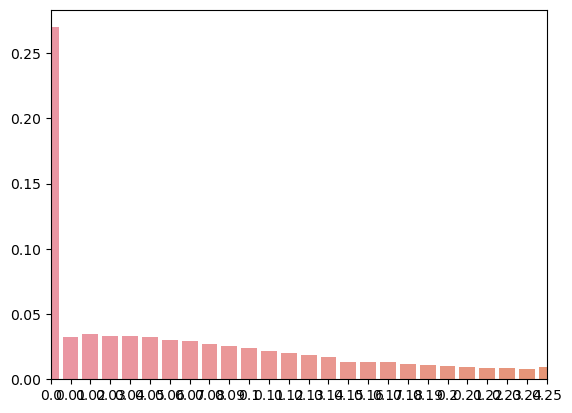

In [68]:
na_pmf = video_game_df['NA_Sales'].value_counts(normalize=True)    
na_pmf_graph = sns.barplot(na_pmf.index, na_pmf.values)
na_pmf_graph.set_xlim(0, 25)

I will now run a CDF of Global Sales

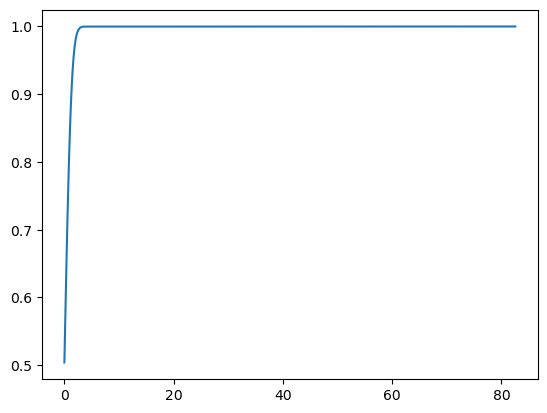

In [74]:
x = video_game_df['Global_Sales']
y = ss.norm.cdf(x)
plt.plot(x, y)

For my distribution I first tried Pareto, but after seeing that it didn't fit that distribution very well I tried the log normal model. This model appears to fit a lot better than pareto which was somewhat surprising to me as the CDF prior looks to follow a Pareto distribution.

In [80]:
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label="weights")

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print("n, mean, std", len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

n, mean, std 6825 0.6485229481237853 0.9636822357223219


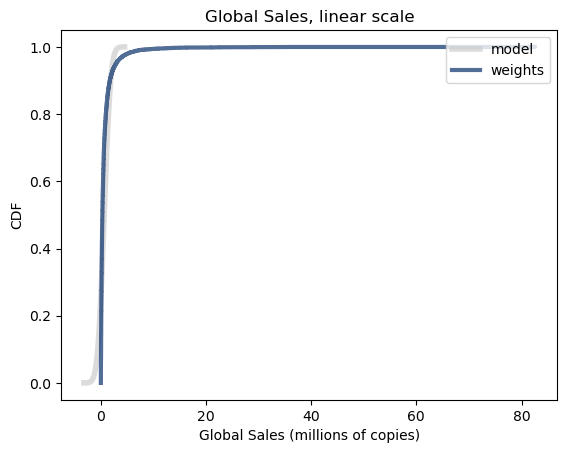

In [81]:
MakeNormalModel(x)
thinkplot.Config(
    title="Global Sales, linear scale",
    xlabel="Global Sales (millions of copies)",
    ylabel="CDF",
    loc="upper right",
)

I will know run 2 scatterplots of critic score and global sales and the other being user score and global sales. 

In [118]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

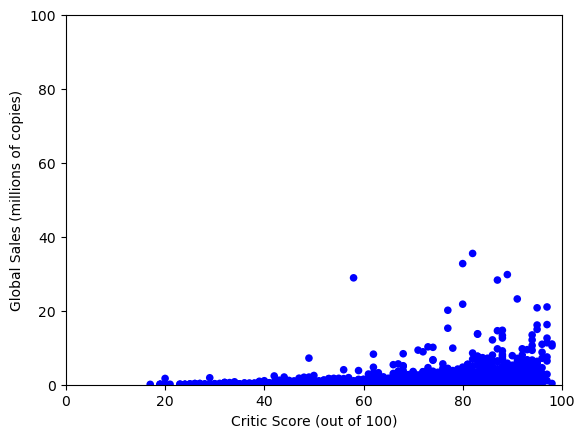

In [119]:
sample = SampleRows(video_game_df, 5000)
critic, sales = sample.Critic_Score, sample.Global_Sales
thinkplot.Scatter(critic, sales, alpha=1)
thinkplot.Config(xlabel='Critic Score (out of 100)',
                 ylabel='Global Sales (millions of copies)',
                 axis=[0, 100, 0, 100],
                 legend=False)

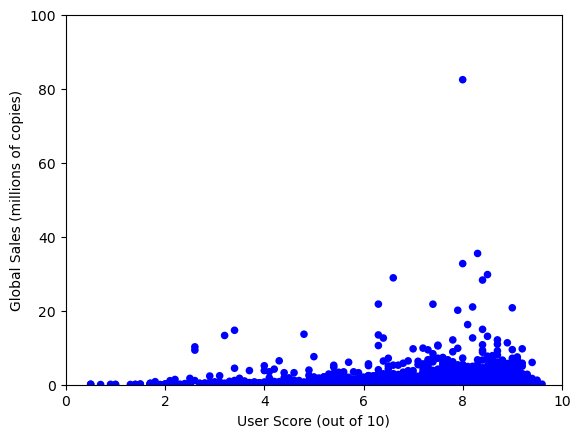

In [109]:
sample = SampleRows(video_game_df, 5000)
user, sales = sample.User_Score, sample.Global_Sales
thinkplot.Scatter(user, sales, alpha=1)
thinkplot.Config(xlabel='User Score (out of 10)',
                 ylabel='Global Sales (millions of copies)',
                 axis=[0, 10, 0, 100],
                 legend=False)

In [110]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [111]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [123]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [116]:
Cov(user, sales)

0.25751641688

In [115]:
Corr(user, sales)

0.08550402749901442

In [125]:
SpearmanCorr(user, sales)

0.007975138900990043

In [120]:
Cov(critic, sales)

6.663578895999999

In [121]:
Corr(critic, sales)

0.26934191994841733

In [124]:
SpearmanCorr(critic, sales)

0.38882908887221124

It appears both variables have week correlations invloved with Global sales. Critic score appears to effect Global Sales more than User score. I find this to be very interesting because I feel like I look more at what my peers think of the game than any critic. Spearmnan's correlation appears to be very helpful in this exercise as it shows that there is a lot higher correlation than we originally thought. The causation for critic score could be due to the fact that critic scores are seen a lot more than the score of a user. You can see the scritic score on most commercials and trailers for a video game, while user score you can only really find if you are searching for it.

I decided to do a slope test and found that there is a significance between the amount of copies sold in North America compared to the amount sold in Japan.

In [140]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [142]:
class SlopeTest(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        na_sales, jp_sales = data
        _, slope = thinkstats2.LeastSquares(na_sales, jp_sales)
        return slope

    def MakeModel(self):
        _, jp_sales = self.data
        self.ybar = jp_sales.mean()
        self.res = jp_sales - self.ybar

    def RunModel(self):
        na_sales, _ = self.data
        jp_sales = self.ybar + np.random.permutation(self.res)
        return na_sales, jp_sales

In [144]:
jp_sales = video_game_df['JP_Sales']
na_sales = video_game_df['NA_Sales']
ht = SlopeTest((na_sales, jp_sales))
pvalue = ht.PValue()
pvalue

0.0

In [145]:
ht.actual, ht.MaxTestStat()

(0.13930044576422393, 0.043817413655360085)

I then ran a simple regression on Global Sales and Critic Score. 

In [147]:
formula = 'Global_Sales ~ Critic_Score'
model = smf.ols(formula, data=video_game_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     521.6
Date:                Fri, 02 Jun 2023   Prob (F-statistic):          5.92e-112
Time:                        10:56:02   Log-Likelihood:                -16151.
No. Observations:                8137   AIC:                         3.231e+04
Df Residuals:                    8135   BIC:                         3.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5176      0.099    -15.396      0.000      -1.711      -1.324
Critic_Score     0.0320      0.001     22.839      0.000       0.029       0.035
==============================================================================
Omnibus:                    17261.113   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        140672186.189
Skew:                          18.200   Prob(JB):                         0.00
Kurtosis:                     646.107   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
inter = results.params['Intercept']
slope = results.params['Critic_Score']
inter, slope

(-1.517566111408763, 0.031994717383654586)

In [149]:
slope_pvalue = results.pvalues['Critic_Score']
slope_pvalue

5.923614898981642e-112

In [150]:
results.rsquared

0.060255853515625124